## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how='inner', on="Mouse ID")

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
mouse_count = merged_data["Mouse ID"].unique()
len(mouse_count)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_row.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_data.loc[merged_data["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data["Mouse ID"] != "g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_data["Mouse ID"].unique()
len(mouse_count)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
means = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
medians = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
means_medians = pd.merge(means, medians, how= "outer", on= "Drug Regimen")
means_medians = means_medians.rename(columns = {"Tumor Volume (mm3)_x" : "Average", "Tumor Volume (mm3)_y": "Median"})
variance_std = pd.merge(variance, std, how = "outer", on = "Drug Regimen")
variance_std = variance_std.rename(columns = {"Tumor Volume (mm3)_x" : "Variance", "Tumor Volume (mm3)_y": "Standard Error"})
summary_stats_df = pd.merge(means_medians, variance_std, how= "outer", on = "Drug Regimen")
summary_stats = pd.merge(summary_stats_df, sem, how ="outer", on = "Drug Regimen")
summary_stats = summary_stats.rename(columns = {"Tumor Volume (mm3)" : "SEM"})
summary_stats


,Average,Median,Variance,Standard Error,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


/Users/lucykaplan/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


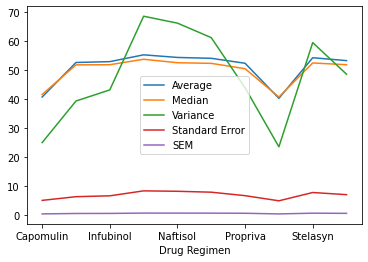

In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_lines = summary_stats.plot.line()

## Bar and Pie Charts

Text(0.5, 1.0, 'Unique Mice Per Drug Regimen')

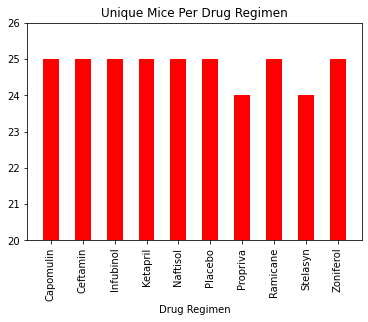

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
capomulin_count = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_count = len(capomulin_count["Mouse ID"].unique())
ceftamin_count = clean_data[clean_data["Drug Regimen"] == "Ceftamin"]
ceftamin_count = len(ceftamin_count["Mouse ID"].unique())
infubinol_count = clean_data[clean_data["Drug Regimen"] == "Infubinol"]
infubinol_count = len(infubinol_count["Mouse ID"].unique())
ketapril_count = clean_data[clean_data["Drug Regimen"] == "Ketapril"]
ketapril_count = len(ketapril_count["Mouse ID"].unique())
naftisol_count = clean_data[clean_data["Drug Regimen"] == "Naftisol"]
naftisol_count = len(naftisol_count["Mouse ID"].unique())
placebo_count = clean_data[clean_data["Drug Regimen"] == "Placebo"]
placebo_count = len(placebo_count["Mouse ID"].unique())
propriva_count = clean_data[clean_data["Drug Regimen"] == "Propriva"]
propriva_count = len(propriva_count["Mouse ID"].unique())
ramicane_count = clean_data[clean_data["Drug Regimen"] == "Ramicane"]
ramicane_count = len(ramicane_count["Mouse ID"].unique())
stelasyn_count = clean_data[clean_data["Drug Regimen"] == "Stelasyn"]
stelasyn_count = len(stelasyn_count["Mouse ID"].unique())
zoniferol_count = clean_data[clean_data["Drug Regimen"] == "Zoniferol"]
zoniferol_count = len(zoniferol_count["Mouse ID"].unique())
unique_mice_df = pd.DataFrame({"Drug Regimen" : ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], "Number of Mice": [capomulin_count, ceftamin_count, infubinol_count, ketapril_count, naftisol_count, placebo_count, propriva_count, ramicane_count, stelasyn_count,zoniferol_count]})
unique_mice_df = unique_mice_df.set_index("Drug Regimen")
unique_mice = unique_mice_df.plot(kind= "bar", legend=False, color = "r")
unique_mice = [capomulin_count, ceftamin_count, infubinol_count, ketapril_count, naftisol_count, placebo_count, propriva_count, ramicane_count, stelasyn_count,zoniferol_count]
x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(20, 26)
plt.xticks(rotation = 90)
plt.title("Unique Mice Per Drug Regimen")

Text(0, 0.5, 'Number of Mice')

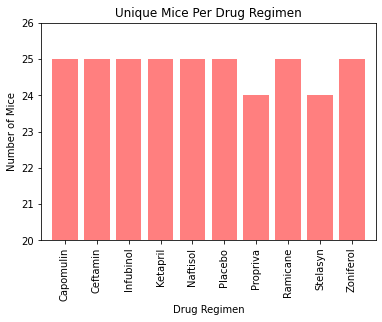

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
unique_mice = [capomulin_count, ceftamin_count, infubinol_count, ketapril_count, naftisol_count, placebo_count, propriva_count, ramicane_count, stelasyn_count,zoniferol_count]
x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.bar(x_axis, unique_mice , color='r', alpha=0.5, align="center")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(20, 26)
plt.xticks(rotation = 90)
plt.title("Unique Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

Text(0.5, 1.0, 'Gender of Mice Used in Trial')

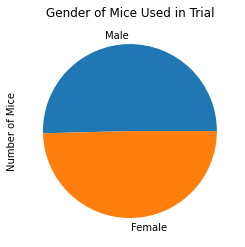

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts= clean_data.groupby(["Sex", "Mouse ID"], as_index=False).count()
counts = counts.loc[:, ["Sex", "Mouse ID"]]
gender_counts = counts["Sex"].value_counts()
gender_counts.plot(kind = "pie", ylabel='Number of Mice', subplots=True)
plt.title("Gender of Mice Used in Trial")

([<matplotlib.patches.Wedge at 0x7fb622fae0b8>,
 [Text(-0.7829277575363617, -0.9094086685748517, 'Female'),
  Text(0.7176837777416649, 0.8336246128602806, 'Male')],
 [Text(-0.45670785856287766, -0.5304883900019968, '49.6%'),
  Text(0.39146387876818084, 0.4547043342874257, '50.4%')])

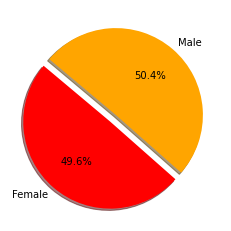

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_counts = len(counts[counts["Sex"] == "Female"])
male_counts = len(counts[counts["Sex"] == "Male"])
sizes = female_counts, male_counts
labels = ["Female", "Male"]
explode = (0.1, 0)
colors = ["red", "orange"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_table = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
ramicane_table = clean_data[clean_data["Drug Regimen"] == "Ramicane"]
ceftamin_table = clean_data[clean_data["Drug Regimen"] == "Ceftamin"]
infubinol_table = clean_data[clean_data["Drug Regimen"] == "Infubinol"]
infubinol_table = infubinol_table.sort_values(by=['Timepoint'], ascending=False)
ceftamin_table = ceftamin_table.sort_values(by=['Timepoint'], ascending=False)
ramicane_table = ramicane_table.sort_values(by=['Timepoint'], ascending=False)
capomulin_table = capomulin_table.sort_values(by=['Timepoint'], ascending=False)
infubinol_greatest = infubinol_table.iloc[0:25, [0, 1, 6]]
ceftamin_greatest = ceftamin_table.iloc[0:25, [0, 1, 6]]
ramicane_greatest = ramicane_table.iloc[0:25, [0, 1, 6]]
capomulin_greatest = capomulin_table.iloc[0:25,[0, 1, 6]]
capomulin = capomulin_greatest.rename(columns = {"Tumor Volume (mm3)" : "Final Tumor Volume"})
ceftamin = ceftamin_greatest.rename(columns = {"Tumor Volume (mm3)" : "Final Tumor Volume"})
ramicane = ramicane_greatest.rename(columns = {"Tumor Volume (mm3)" : "Final Tumor Volume"})
infubinol = infubinol_greatest.rename(columns = {"Tumor Volume (mm3)" : "Final Tumor Volume"})
capomulin_ramicane = pd.merge(capomulin, ramicane, how='outer', on=None)
ceftamin_infubinol = pd.merge(ceftamin, infubinol, how='outer', on=None)
final_tumor_vals = pd.merge(capomulin_ramicane, ceftamin_infubinol, how='outer', on=None)
final_tumor_vals

,Mouse ID,Drug Regimen,Final Tumor Volume
0,r554,Capomulin,32.377357
1,w914,Capomulin,36.041047
2,g316,Capomulin,40.159220
3,m601,Capomulin,28.430964
4,u364,Capomulin,31.023923
...,...,...,...
95,c139,Infubinol,67.821420
96,a685,Infubinol,58.092629
97,e476,Infubinol,60.064340
98,k483,Infubinol,60.541562


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = final_tumor_vals["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
quartiles = final_tumor_vals['Final Tumor Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)



In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

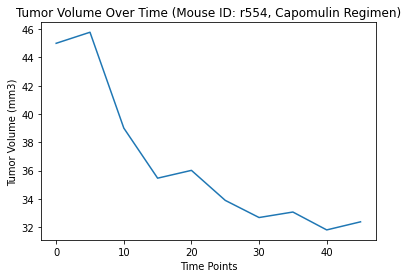

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = clean_data[clean_data["Mouse ID"] == "r554"]
capomulin_mouse = capomulin_mouse.iloc[:, [0, 5, 6]]
time_points = capomulin_mouse.iloc[:, 1]
tumor_volume = capomulin_mouse.iloc[:, 2]
plt.plot(time_points, tumor_volume)
plt.title("Tumor Volume Over Time (Mouse ID: r554, Capomulin Regimen)")
plt.xlabel("Time Points")
plt.ylabel("Tumor Volume (mm3)")

/Users/lucykaplan/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(10, 40, 'y = 0.95x + 21.55')

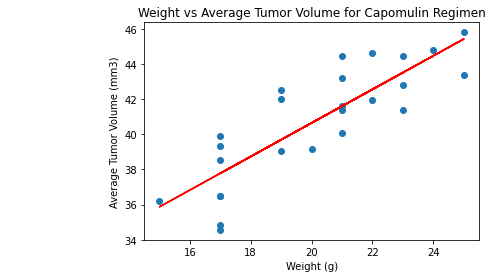

In [100]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_data = capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)", "Weight (g)"].mean()
capomulin_data = pd.DataFrame(capomulin_data)
x_values = capomulin_data.iloc[:,1]
y_values = capomulin_data.iloc[:,0]
plt.scatter(weight,volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Average Tumor Volume for Capomulin Regimen')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

## Correlation and Regression

In [101]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, volume)
print(f"The correlation between weight and tumor volume for the Capomulin regimen is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")

The correlation between weight and tumor volume for the Capomulin regimen is 0.84
The r-squared is: 0.7088568047708717
